C:\ProgramData\anaconda3\envs\py311-scz\Lib\site-packages\scikit_learn-1.3.2-py3.11-win-amd64.egg\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\ProgramData\anaconda3\envs\py311-scz\Lib\site-packages\scikit_learn-1.3.2-py3.11-win-amd64.egg\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


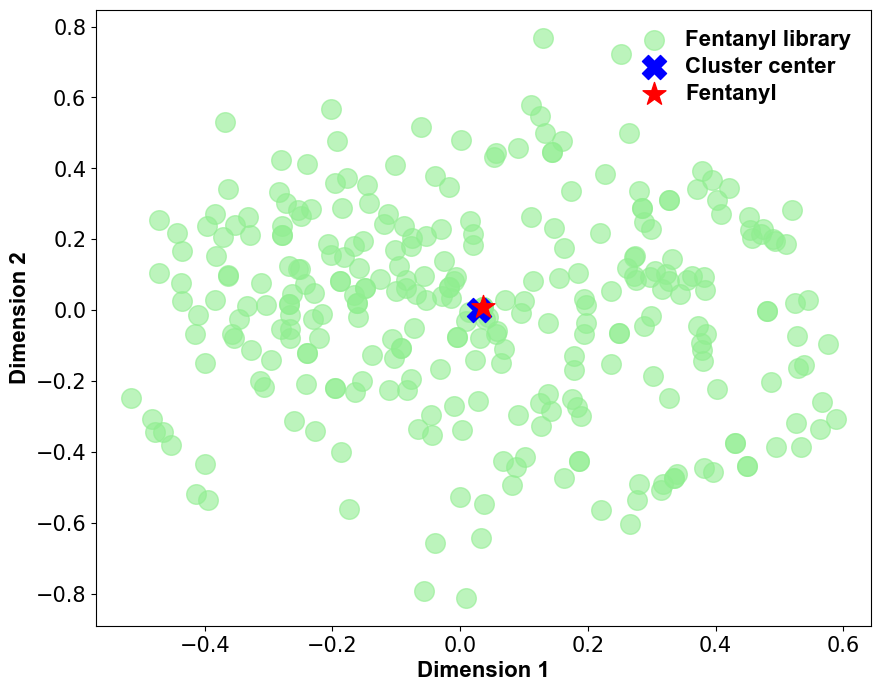

Cluster Center: (0.03, 0.00)
Target SMILES: CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3 at Coordinates: (0.04, 0.01)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

# Load dataset containing SMILES and labels
peak_table_path = "chemical.xlsx"
df = pd.read_excel(peak_table_path)

# Generate molecular fingerprints
def get_fingerprint(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
            return fp
        else:
            return None
    except:
        return None

df['Fingerprint'] = df['SMILES'].apply(get_fingerprint)
df = df.dropna(subset=['Fingerprint'])  # Remove rows without fingerprints

# Compute Tanimoto similarity matrix
fingerprints = list(df['Fingerprint'])
num_fingerprints = len(fingerprints)
tanimoto_matrix = np.zeros((num_fingerprints, num_fingerprints))

for i in range(num_fingerprints):
    for j in range(num_fingerprints):
        if i == j:
            tanimoto_matrix[i][j] = 1.0
        else:
            sim = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
            tanimoto_matrix[i][j] = sim

# Apply MDS for dimensionality reduction
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(1 - tanimoto_matrix)

df['X'] = coords[:, 0]
df['Y'] = coords[:, 1]

# Select green points (labeled 'Our dataset')
green_subset = df[df['Label'] == 'Our dataset']

# K-Means clustering
kmeans = KMeans(n_clusters=1, random_state=42)  # Assuming one cluster center
kmeans.fit(green_subset[['X', 'Y']])
centroid = kmeans.cluster_centers_[0]

# Plot the chemical space
plt.figure(figsize=(10, 8))

plt.scatter(green_subset['X'], green_subset['Y'], c='lightgreen', alpha=0.6, s=200, label='Fentanyl library')

# Plot the cluster center
plt.scatter(centroid[0], centroid[1], c='blue', marker='X', s=300, label='Cluster center')

# Highlight specific SMILES
target_smiles = "CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3"
target_index = df[df['SMILES'] == target_smiles].index[0]
target_coords = [df.loc[target_index, 'X'], df.loc[target_index, 'Y']]

# Plot the target SMILES point
plt.scatter(target_coords[0], target_coords[1], c='red', marker='*', s=300, label='Fentanyl')

# Set font to Arial
font_properties = font_manager.FontProperties(family='Arial', size=16, weight='bold')
plt.xlabel('Dimension 1', fontproperties=font_properties)
plt.ylabel('Dimension 2', fontproperties=font_properties)

# Bold axis ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Configure legend placement and spacing
plt.legend(prop=font_properties, frameon=False, handletextpad=0.4, labelspacing=0.3, 
           loc='upper right', bbox_to_anchor=(1, 1))

# Save and display the figure
plt.savefig('figure.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

# Output cluster center and target SMILES info
print(f"Cluster Center: ({centroid[0]:.2f}, {centroid[1]:.2f})")
print(f"Target SMILES: {target_smiles} at Coordinates: ({target_coords[0]:.2f}, {target_coords[1]:.2f})")


C:\ProgramData\anaconda3\envs\py311-scz\Lib\site-packages\scikit_learn-1.3.2-py3.11-win-amd64.egg\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


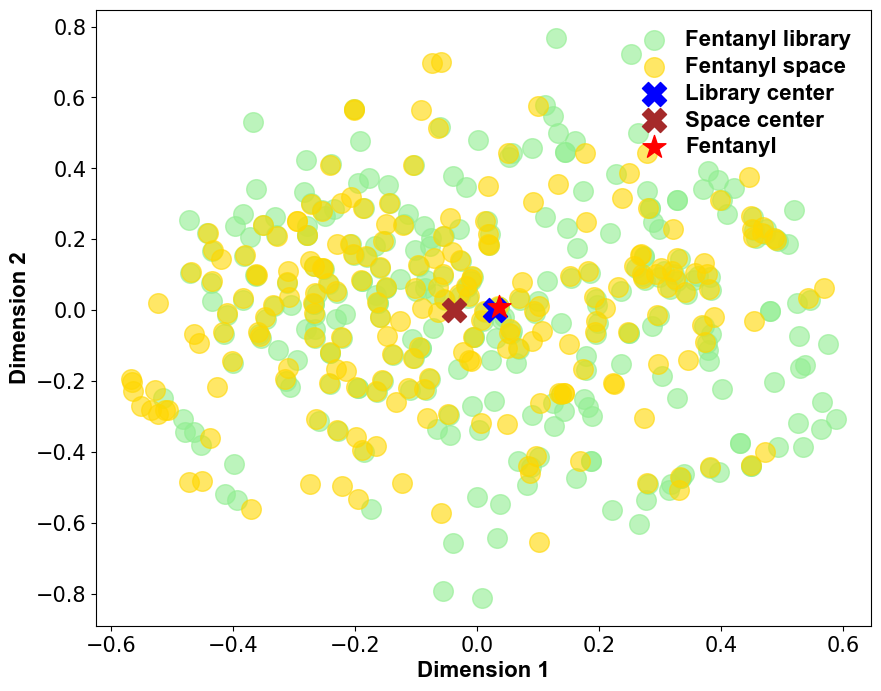

Green Cluster Center: (0.03, 0.00)
Yellow Cluster Center: (-0.04, -0.00)
Target SMILES: CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3 at Coordinates: (0.04, 0.01)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from sklearn.cluster import KMeans

# Load the dataset containing SMILES and labels
peak_table_path = "chemical.xlsx"
df = pd.read_excel(peak_table_path)

# Filter yellow points
yellow_subset = df[df['Label'] == 'Fentanyl space']

# K-Means clustering (assuming only one center)
kmeans_yellow = KMeans(n_clusters=1, random_state=42)
kmeans_yellow.fit(yellow_subset[['X', 'Y']])
centroid_yellow = kmeans_yellow.cluster_centers_[0]

# Plot the chemical space
plt.figure(figsize=(10, 8))

# Plot green points
plt.scatter(green_subset['X'], green_subset['Y'], c='lightgreen', alpha=0.6, s=200, label='Fentanyl library')

# Plot yellow points
plt.scatter(yellow_subset['X'], yellow_subset['Y'], c='gold', alpha=0.6, s=200, label='Fentanyl space')

# Plot green cluster center
plt.scatter(centroid[0], centroid[1], c='blue', marker='X', s=300, label='Library center')

# Plot yellow cluster center
plt.scatter(centroid_yellow[0], centroid_yellow[1], c='brown', marker='X', s=300, label='Space center')

# Mark specific SMILES
target_smiles = "CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3"
target_index = df[df['SMILES'] == target_smiles].index[0]
target_coords = [df.loc[target_index, 'X'], df.loc[target_index, 'Y']]

# Plot target coordinates
plt.scatter(target_coords[0], target_coords[1], c='red', marker='*', s=300, label='Fentanyl')

# Set font to Arial
font_properties = font_manager.FontProperties(family='Arial', size=16, weight='bold')
plt.xlabel('Dimension 1', fontproperties=font_properties)
plt.ylabel('Dimension 2', fontproperties=font_properties)

# Set bold font for axis numbers
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Set legend
plt.legend(prop=font_properties, frameon=False, handletextpad=0.4, labelspacing=0.3, 
           loc='upper right', bbox_to_anchor=(1, 1))

# Show plot
plt.show()

# Output cluster centers and target SMILES information
print(f"Green Cluster Center: ({centroid[0]:.2f}, {centroid[1]:.2f})")
print(f"Yellow Cluster Center: ({centroid_yellow[0]:.2f}, {centroid_yellow[1]:.2f})")
print(f"Target SMILES: {target_smiles} at Coordinates: ({target_coords[0]:.2f}, {target_coords[1]:.2f})")
